In [1]:
import pandas as pd
import numpy as np
import matplotlib as matlab
import statsmodels

# Data

In [3]:
air = pd.read_csv("/content/AirPassengers.csv")
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Week_num                      80 non-null     int64  
 1   Passengers                    80 non-null     int64  
 2   Promotion_Budget              80 non-null     int64  
 3   Service_Quality_Score         80 non-null     float64
 4   Holiday_week                  80 non-null     object 
 5   Delayed_Cancelled_flight_ind  80 non-null     object 
 6   Inter_metro_flight_ratio      80 non-null     float64
 7   Bad_Weather_Ind               80 non-null     object 
 8   Technical_issues_ind          80 non-null     object 
dtypes: float64(2), int64(3), object(4)
memory usage: 5.8+ KB


# Correlation

In [4]:
np.corrcoef(air.Passengers,air.Promotion_Budget)

array([[1.        , 0.96585103],
       [0.96585103, 1.        ]])

# Regression

In [5]:
import statsmodels.formula.api as sm
model = sm.ols(formula='Passengers ~ Promotion_Budget', data=air)
fitted1 = model.fit()
print(fitted1.summary())

                            OLS Regression Results                            
Dep. Variable:             Passengers   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     1084.
Date:                Thu, 02 Oct 2025   Prob (F-statistic):           1.66e-47
Time:                        22:45:26   Log-Likelihood:                -751.34
No. Observations:                  80   AIC:                             1507.
Df Residuals:                      78   BIC:                             1511.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1259.6058   1361.071  

In [ ]:
#b0 ==> Intercept  ==>
#b1 ===> coeff prmo budget ==>

In [ ]:
# y = b0 +b1*x
# Passengers = 1259.6058 + 0.0695 * (promo_budget)
# promo_budget = 500,000 ==> Predict passengers ?

# R Squared

In [6]:
##Regression Model inter_metro_flight_ratio and passengers count
#matlab.pyplot.scatter(air.Inter_metro_flight_ratio,air.Passengers)

import statsmodels.formula.api as sm
model = sm.ols(formula='Passengers ~ Inter_metro_flight_ratio', data=air)
fitted2 = model.fit()
print(fitted2.summary())

                            OLS Regression Results                            
Dep. Variable:             Passengers   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     24.90
Date:                Thu, 02 Oct 2025   Prob (F-statistic):           3.58e-06
Time:                        22:45:35   Log-Likelihood:                -848.30
No. Observations:                  80   AIC:                             1701.
Df Residuals:                      78   BIC:                             1705.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

# Multiple Regerssion Model

In [7]:
model = sm.ols(formula='Passengers ~ Promotion_Budget+Service_Quality_Score+Inter_metro_flight_ratio', data=air)
fitted = model.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:             Passengers   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     495.6
Date:                Thu, 02 Oct 2025   Prob (F-statistic):           8.71e-50
Time:                        22:45:39   Log-Likelihood:                -738.45
No. Observations:                  80   AIC:                             1485.
Df Residuals:                      76   BIC:                             1494.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

#Linear Regression with Sk-Learn

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
#Import the Dataset: Product Sales Data/Product_sales.csv
sales=pd.read_csv("/content/Product_sales.csv")

In [11]:
import sklearn as sk
from sklearn import linear_model

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(sales[["Age"]], sales[["Bought"]])


LinearRegression()

In [12]:
print("intercept",lr.intercept_)
print("Co-efficient",lr.coef_)

intercept [-0.17041247]
Co-efficient [[0.02094213]]


In [14]:
d1=pd.DataFrame({"Age":[4]})
predict1=lr.predict(d1)
print(predict1)

[[-0.08664394]]


In [15]:
#If Age is 105 then will that customer buy the product?
d2=pd.DataFrame({"Age":[105]})
predict2=lr.predict(d2)
print(predict2)

[[2.02851132]]


## Drawing Linear Regression line

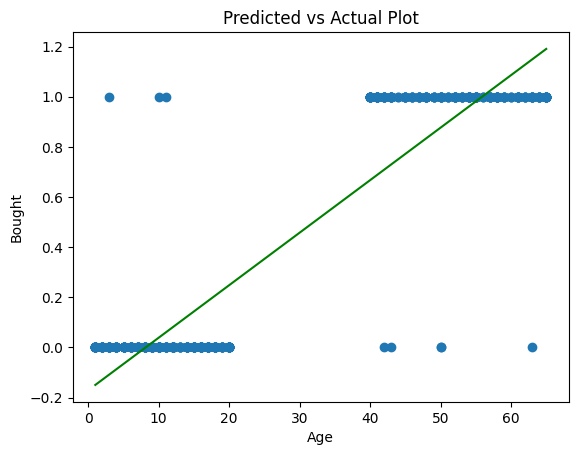

In [16]:
new_data=sales.drop(["Bought"], axis=1)
#Pass the variables to get the predicted values. Add actual values in a new column
new_data["pred_values"]= lr.predict(new_data)
new_data["Actual"]=sales["Bought"]

#Sort the data and draw the graph
new_data=new_data.sort_values(["pred_values"])
plt.scatter(new_data["Age"], new_data["Actual"])
plt.plot(new_data["Age"], new_data["pred_values"], color='green')
#Add lables and title
plt.title('Predicted vs Actual Plot')
plt.xlabel('Age')
plt.ylabel('Bought')
plt.show()

# Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(sales[["Age"]],sales["Bought"])

LogisticRegression()

In [18]:
print("Intercept", logistic.intercept_)
print("Coefficient", logistic.coef_)

Intercept [-6.90722429]
Coefficient [[0.21777169]]


In [19]:
#A 4 years old customer, will he buy the product?

predict_age1=logistic.predict(d1)
print(predict_age1)

[0]


In [20]:
#If Age is 105 then will that customer buy the product?

predict_age2=logistic.predict(d2)
print(predict_age2)

[1]


## Drawing Logistic Regression line

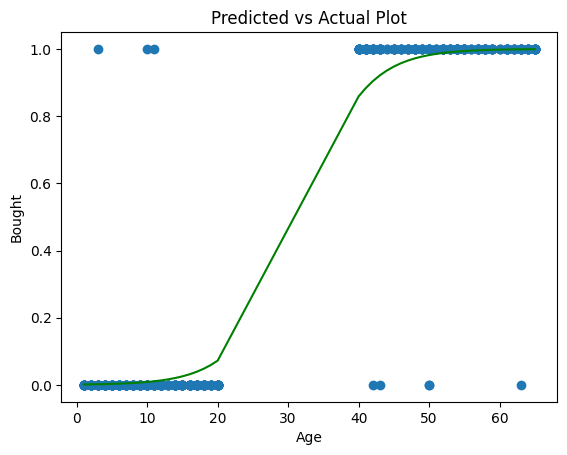

In [21]:
new_data=sales.drop(["Bought"], axis=1)
#Pass the variables to get the predicted values. Add actual values in a new column
new_data["pred_values"]= logistic.predict_proba(new_data)[:,1]
new_data["Actual"]=sales["Bought"]

#Sort the data and draw the graph
new_data=new_data.sort_values(["pred_values"])
plt.scatter(new_data["Age"], new_data["Actual"])
plt.plot(new_data["Age"], new_data["pred_values"], color='green')
#Add lables and title
plt.title('Predicted vs Actual Plot')
plt.xlabel('Age')
plt.ylabel('Bought')
plt.show()

# Multiple Logistic Regression

In [34]:
Fiber=pd.read_csv("/content/Fiberbits_v1_balanced_80acc.csv")

In [35]:
Fiber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   active_cust                 100000 non-null  int64
 1   income                      100000 non-null  int64
 2   months_on_network           100000 non-null  int64
 3   Num_complaints              100000 non-null  int64
 4   number_plan_changes         100000 non-null  int64
 5   relocated                   100000 non-null  int64
 6   monthly_bill                100000 non-null  int64
 7   technical_issues_per_month  100000 non-null  int64
 8   Speed_test_result           100000 non-null  int64
dtypes: int64(9)
memory usage: 6.9 MB


In [36]:
logistic1= LogisticRegression(max_iter=200)
###fitting logistic regression for active customer on rest of the variables#######
logistic1.fit(Fiber[["income"]+['months_on_network']+['Num_complaints']+['number_plan_changes']+['relocated']+['monthly_bill']+['technical_issues_per_month']+['Speed_test_result']],Fiber[['active_cust']])


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [37]:
print("Intercept", logistic1.intercept_)
print("Coefficients", logistic1.coef_)

Intercept [-0.11235874]
Coefficients [[ 8.07233606e-06 -6.15089158e-04 -1.77788839e-01 -2.98106224e-02
  -6.54796509e-02 -3.80429375e-03 -9.31192887e-03  1.92128110e-02]]


# Confusion Matrix & Accuracy

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [39]:
predict1=logistic1.predict(Fiber[["income"]+['months_on_network']+['Num_complaints']+['number_plan_changes']+['relocated']+['monthly_bill']+['technical_issues_per_month']+['Speed_test_result']])
predict1

cm1 = confusion_matrix(Fiber[['active_cust']],predict1)
print(cm1)

[[47048 11272]
 [18084 23596]]


In [40]:
print("col sums", sum(cm1))
total1=sum(sum(cm1))
print("Total", total1)


col sums [65132 34868]
Total 100000


In [41]:
accuracy1=(cm1[0,0]+cm1[1,1])/total1
accuracy1

np.float64(0.70644)

# Cross Validation

In [42]:
from sklearn import model_selection
train_data,test_data = model_selection.train_test_split(Fiber, test_size=0.2)

print("train Data Shape ",train_data.shape)
print("test Data Shape  ",test_data.shape)


train Data Shape  (80000, 9)
test Data Shape   (20000, 9)


In [43]:
logistic2= LogisticRegression(max_iter=200)
###fitting logistic regression for active customer on rest of the variables#######
logistic2.fit(train_data[["income"]+['months_on_network']+['Num_complaints']+['number_plan_changes']+['relocated']+['monthly_bill']+['technical_issues_per_month']+['Speed_test_result']],train_data[['active_cust']])


predict=logistic2.predict(train_data[["income"]+['months_on_network']+['Num_complaints']+['number_plan_changes']+['relocated']+['monthly_bill']+['technical_issues_per_month']+['Speed_test_result']])
cm_train = confusion_matrix(train_data[['active_cust']],predict)
accuracy_train=(cm_train[0,0]+cm_train[1,1])/sum(sum(cm_train))
print("accuracy on train data" , accuracy_train)


predict=logistic2.predict(test_data[["income"]+['months_on_network']+['Num_complaints']+['number_plan_changes']+['relocated']+['monthly_bill']+['technical_issues_per_month']+['Speed_test_result']])
cm_test = confusion_matrix(test_data[['active_cust']],predict)
accuracy_test=(cm_test[0,0]+cm_test[1,1])/sum(sum(cm_test))
print("accuracy on test data" , accuracy_test)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy on train data 0.7070375
accuracy on test data 0.69875


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
